In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sacc
import os

In [2]:
def make_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

In [56]:
plt.rc("text", usetex=True)
plt.rc("font", family="serif")

In [57]:
dir = '../data_vectors/cosmodc2/2022/star_sample/Sep14/'

folder_bias = 'analytic_noise/bias_fit_by_eye/'

# fourier space
file = folder_bias+ 'summary_statistics_fourier_tjpcov.sacc'
df = sacc.Sacc.load_fits(dir+file)
file = folder_bias + 'twopoint_theory_fourier.sacc'
tf = sacc.Sacc.load_fits(dir+file)


folder_bias = 'pixel_based/bias_fit_by_eye/'
# real space
file = folder_bias+'summary_statistics_real.sacc' 
dr = sacc.Sacc.load_fits(dir+file)
file = folder_bias +'twopoint_theory_real.sacc' 
tr = sacc.Sacc.load_fits(dir+file)

make_directory(dir + 'plots/paper_plots/')
c = ["#474747", "#6992C2", "#C0E0FF", "#FADA77", "#FEB580", 'tomato', 'firebrick']

In [5]:
W = "galaxy_density_xi"
GAMMA = "galaxy_shearDensity_xi_t"
GAMMAX = "galaxy_shearDensity_xi_x"
XIP = "galaxy_shear_xi_plus"
XIM = "galaxy_shear_xi_minus"
EE = "galaxy_shear_cl_ee"
DD = "galaxy_density_cl"
ED = "galaxy_shearDensity_cl_e"

In [6]:
# Redshift bins
nsbins = 5
nlbins = 5

# Scaling factor for the gaussian sims
#sims_factor = np.array([2.458, 2.043, 1.878, 2.060, 2.249])
sims_factor = np.ones(nlbins)

# GGL and clustering cuts as computed in https://github.com/LSSTDESC/txpipe-cosmodc2/blob/master/notebooks/ScaleCutsSRD.ipynb
lmin = 20
lmax_zl = [252.27086242, 401.05572005, 534.43202612, 653.61625038, 760.14254387] 
lmax_cs = 3000 #lmax for cosmic shear
theta_min = [42.81112728, 26.92892648, 20.20836977, 16.52345699, 14.20786152] #arcmin

theta_0, theta_1 = 2.5, 250
#from https://github.com/CosmoLike/DESC_SRD/blob/master/gglensing_zbin_y1
GGL_combinations_dict = {
    'zl0zs0': 0,
    'zl0zs1': 0,
    'zl0zs2': 1,
    'zl0zs3': 1,
    'zl0zs4': 1,
    'zl1zs0': 0,
    'zl1zs1': 0,
    'zl1zs2': 0,
    'zl1zs3': 1,
    'zl1zs4': 1,
    'zl2zs0': 0,
    'zl2zs1': 0,
    'zl2zs2': 0,
    'zl2zs3': 0,
    'zl2zs4': 1,
    'zl3zs0': 0,
    'zl3zs1': 0,
    'zl3zs2': 0,
    'zl3zs3': 0,
    'zl3zs4': 1,
    'zl4zs0': 0,
    'zl4zs1': 0,
    'zl4zs2': 0,
    'zl4zs3': 0,
    'zl4zs4': 0}

In [7]:
def plot_cosmic_shear_real_auto(dr, tr):

    name1 = 'source'
    name2 = 'source'
    fig, ax = plt.subplots(2, nsbins, figsize=(2.2*nsbins, 2.2*2), sharey=True, sharex=True)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
        
    for j in range(nsbins):       
          
        for i in range (0,2):
            if i ==0: 
                dt = XIP
            else: 
                dt = XIM
            
            # this returns the gaussian cov
            theta, xi, cov = dr.get_theta_xi(dt,'%s_%s'%(name1,j) , '%s_%s'%(name2, j), return_cov = True)
            err = np.sqrt(np.diag(cov))
            theta_th, xi_th = tr.get_theta_xi(dt,'%s_%s'%(name1,j) , '%s_%s'%(name2, j), return_cov = False)

            ax[i][j].plot(theta, xi_th, ls = '-', lw = '1.5', color = c[j], label = 'Theory')
            ax[i][j].errorbar(theta, xi, err, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[j], label = 'Measurements')

            #ax[i][j].text(0.5, 0.88, "(%d, %d)"%(j+1, j+1), horizontalalignment='center',
            #                        verticalalignment='center', transform=ax[i][j].transAxes)#, fontsize=12)
            ax[i][j].set_xscale('log')
            ax[i][j].set_yscale('log')
            ax[i][j].set_xlim(theta_0, theta_1)
            ax[1][j].set_xlabel(r'$\theta$ [arcmin]')
            if dt==XIP:
                ax[i][j].set_ylim(4*10**(-7), 6*10**(-4))
                ax[i][0].set_ylabel(r'$\xi_+$')
            if dt==XIM:
                ax[i][j].set_ylim(2*10**(-7), 6*10**(-4))
                ax[i][0].set_ylabel(r'$\xi_-$')

            #ax[0][0].legend(frameon = False, loc = 'best')

    return fig


In [8]:
def plot_cosmic_shear_fourier_auto(df, tf):

    name1 = 'source'
    name2 = 'source'
    fig, ax = plt.subplots(2, nsbins, figsize=(2.2*nsbins, 3.), sharey='row', sharex=True, gridspec_kw={'height_ratios': [2, 1]})
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
        
    for j in range(nsbins):       


            ell, cl, cov = df.get_ell_cl(EE,'%s_%s'%(name1,j) , '%s_%s'%(name2, j), return_cov = True)
            err = np.sqrt(np.diag(cov))
            ell_th, cl_th = tf.get_ell_cl(EE,'%s_%s'%(name1,j) , '%s_%s'%(name2, j), return_cov = False)

            ax[0][j].plot(ell_th, cl_th, ls = '-', lw = '1.5', color = c[j], label = 'Theory')
            ax[0][j].errorbar(ell, cl, err, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[j], label = 'Measurements')
            if j <2:
                print(ell, cl)
                print(cl/cl_th)
            ax[1][j].errorbar(ell, cl/cl_th, err/cl_th, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[j])                              

            ax[1][j].set_xlabel(r'$\ell$')

            
            ax[0][0].set_ylabel(r'$C_{\gamma \gamma}(\ell)$')
            #ax[1][0].set_ylabel(r'Data/theory')
            ax[1][j].axhline(y=1, ls = ':', color = 'k')
            ax[0][j].set_yscale('log')  
            
            ax[0][j].set_ylim(3*10**(-12), 8*10**(-8))
            ax[1][j].set_ylim(0, 2)
            for k in range(2):
                ax[k][j].set_xlim(lmin, lmax_cs)
                ax[k][j].set_xscale('log')
                ax[k][j].axvspan(lmax_cs, 3000, color='lightgrey', alpha = 0.3)
                ax[k][j].set_xscale('log')
        
    

    return fig


[  23.    32.    45.    62.5   87.   121.   168.   233.5  324.5  450.5
  624.5  866.  1201.5 1666.  2309.5 3202.5] [ 8.46485505e-09  2.00405311e-09 -8.62030380e-10  1.57107178e-10
  1.10355548e-09  7.25074789e-10  2.98895452e-11 -3.20901281e-10
  1.13381496e-10 -9.75376405e-11  4.13197763e-11 -2.03511152e-11
  3.06214585e-11  1.27951502e-11 -3.35115967e-11  1.04345657e-11]
[ 1.42317945  1.37111565 -0.56462672  0.17253738  1.80587713  1.79197542
  0.10977538 -1.74383676  0.90683942 -1.1583161   0.74246368 -0.57084731
  1.39258412  0.98044357 -4.49188293  2.53725448]
[  23.    32.    45.    62.5   87.   121.   168.   233.5  324.5  450.5
  624.5  866.  1201.5 1666.  2309.5 3202.5] [ 1.71718765e-09  1.35613031e-08  2.61421814e-09  2.92259073e-09
  2.70861747e-09  4.63885114e-10 -9.25398947e-11  3.66145775e-10
 -1.13927710e-10  1.58282598e-10  2.29270064e-10  1.32917649e-10
  1.20186998e-11 -1.52114821e-11  4.51977620e-11  1.38410731e-11]
[ 0.12190913  3.66329273  0.68495977  1.27079683  1.

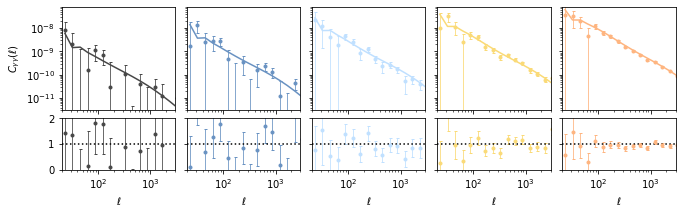

In [12]:
fig = plot_cosmic_shear_fourier_auto(df, tf)

In [13]:
def plot_cosmic_shear_fourier(df, tf):

    name1 = 'source'
    name2 = 'source'
    fig, ax = plt.subplots(nlbins*2, nlbins, figsize=(2.2*nsbins, 2.2*nsbins*1.1), sharey='row', sharex=True, gridspec_kw={'height_ratios': [3., 1, 3., 1, 3., 1, 3., 1, 3., 1]})
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
        
        

                
    for i in range(nsbins*2):    
         for j in range(nsbins):  
            
            if i>=j:
                ell, cl, cov = df.get_ell_cl(EE,'%s_%s'%(name1,int(i/2)) , '%s_%s'%(name2, j), return_cov = True)
                #print(i,j, cl)
                ell_th, cl_th = tf.get_ell_cl(EE,'%s_%s'%(name1,int(i/2)) , '%s_%s'%(name2, j))
                err = np.sqrt(np.diag(cov))
                ax[i][j].set_xlim(lmin, 3000)
                
                if i%2==0:
                    ax[i][j].plot(ell_th, cl_th, ls = '-', lw = '1.5', color = c[j], label = 'Theory')
                    ax[i][j].errorbar(ell, cl, err, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[j], label = 'Measurements')
                    ax[0][j].set_xlabel(r'$\ell$')
                    ax[i][0].set_ylabel(r'$C_{\gamma \gamma}(\ell)$')
                    ax[i][j].set_xscale('log')
                    ax[i][j].set_yscale('log')   

                    ax[i][j].set_ylim(3*10**(-12), 8*10**(-8))

                    ax[i][j].text(0.5, 0.88, "(%d, %d)"%(int(i/2)+1, j+1), horizontalalignment='center',
                                    verticalalignment='center', transform=ax[i][j].transAxes)#, fontsize=12)
                else:
                    ax[i][j].set_ylim(0.5,1.5)
                    ax[i][j].axhline(y=1, ls = ':', color = 'k')
                    ax[i][j].errorbar(ell, cl/cl_th, err/cl_th, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[j])

            if (int(i/2))<j:
                fig.delaxes(ax[i, j])
            


    return fig

In [14]:
def plot_cosmic_shear_real(df, tf):

    name1 = 'source'
    name2 = 'source'
    fig, ax = plt.subplots(nlbins*2, nlbins, figsize=(2.2*nsbins, 2.2*nsbins*1.1), sharey='row', sharex=True, gridspec_kw={'height_ratios': [3., 1, 3., 1, 3., 1, 3., 1, 3., 1]})
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    cxim = 'gray'
                
    for i in range(nsbins*2):    
         for j in range(nsbins):  
            
            if i>=j:
                theta, xip, cov_xip = df.get_theta_xi(XIP,'%s_%s'%(name1,int(i/2)) , '%s_%s'%(name2, j), return_cov = True)
                theta, xim, cov_xim = df.get_theta_xi(XIM,'%s_%s'%(name1,int(i/2)) , '%s_%s'%(name2, j), return_cov = True)
                #print(i,j, cl)
                theta, xip_th = tf.get_theta_xi(XIP,'%s_%s'%(name1,int(i/2)) , '%s_%s'%(name2, j))
                theta, xim_th = tf.get_theta_xi(XIM,'%s_%s'%(name1,int(i/2)) , '%s_%s'%(name2, j))
                err_xip = np.sqrt(np.diag(cov_xip))
                err_xim = np.sqrt(np.diag(cov_xim))
                ax[i][j].set_xlim(2.5, 250)
                
                if i%2==0:
                    ax[i][j].plot(theta, xip_th, ls = '-', lw = '1.5', color = c[j])
                    ax[i][j].plot(theta, xim_th, ls = '-', lw = '1.5', color = cxim, alpha = 0.7)
                    ax[i][j].errorbar(theta, xip,err_xip, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[j], label = r'$\xi_+$')
                    ax[i][j].errorbar(theta, xim,err_xim, fmt = 'x', capsize=1.5, elinewidth=0.8, color = cxim, label = r'$\xi_-$', alpha =0.7)
                    ax[0][j].set_xlabel(r'$\theta$ [arcmin]')
                    ax[i][0].set_ylabel(r'$\xi_{+/-}$')
                    ax[i][j].set_xscale('log')
                    ax[i][j].set_yscale('log')   

                    ax[i][j].set_ylim(2*10**(-7), 2*10**(-4))

                    ax[i][j].text(0.5, 0.88, "(%d, %d)"%(int(i/2)+1, j+1), horizontalalignment='center',
                                    verticalalignment='center', transform=ax[i][j].transAxes)#, fontsize=12)
                else:
                    ax[i][j].set_ylim(0.5,1.5)
                    ax[i][j].axhline(y=1, ls = ':', color = 'k')
                    ax[i][j].errorbar(theta, xip/xip_th, err_xip/xip_th, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[j])
                    ax[i][j].errorbar(theta*1.03, xim/xim_th, err_xim/xim_th, fmt = 'x', capsize=1.5, elinewidth=0.8, color = cxim, alpha = 0.7)

            if (int(i/2))<j:
                fig.delaxes(ax[i, j])
            
            ax[0][0].legend(frameon=False)

    return fig

/Users/juditprat/anaconda3/anaconda3/lib/python3.7/site-packages/sacc/sacc.py:370: UserWarning: Empty index selected - maybe you should check the tracer order?
  warnings.warn("Empty index selected - maybe you "


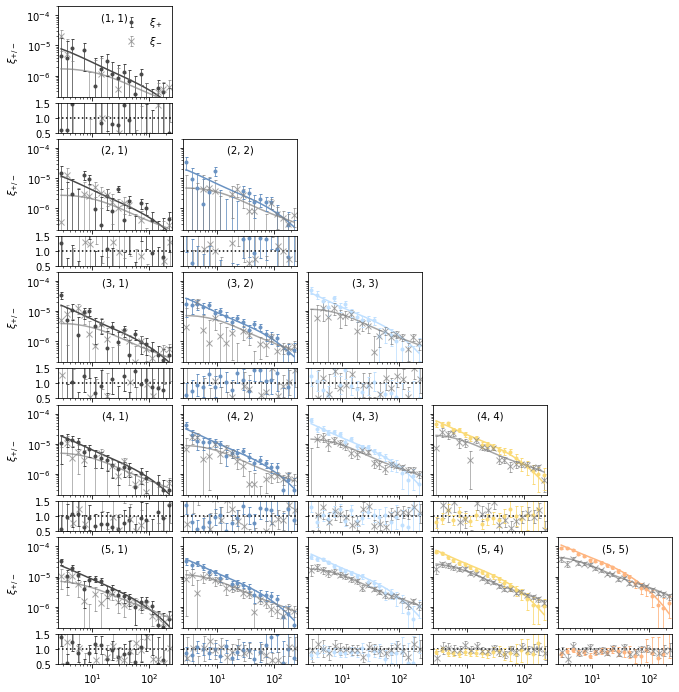

In [15]:
fig = plot_cosmic_shear_real(dr, tr)
plt.savefig(dir + 'plots/paper_plots/' + 'cosmic_shear_real.png', dpi = 500, bbox_inches = 'tight',  pad_inches = 0.1)
plt.savefig(dir + 'plots/paper_plots/' + 'cosmic_shear_real.pdf', bbox_inches = 'tight',  pad_inches = 0.1)

/Users/juditprat/anaconda3/anaconda3/lib/python3.7/site-packages/sacc/sacc.py:370: UserWarning: Empty index selected - maybe you should check the tracer order?
  warnings.warn("Empty index selected - maybe you "


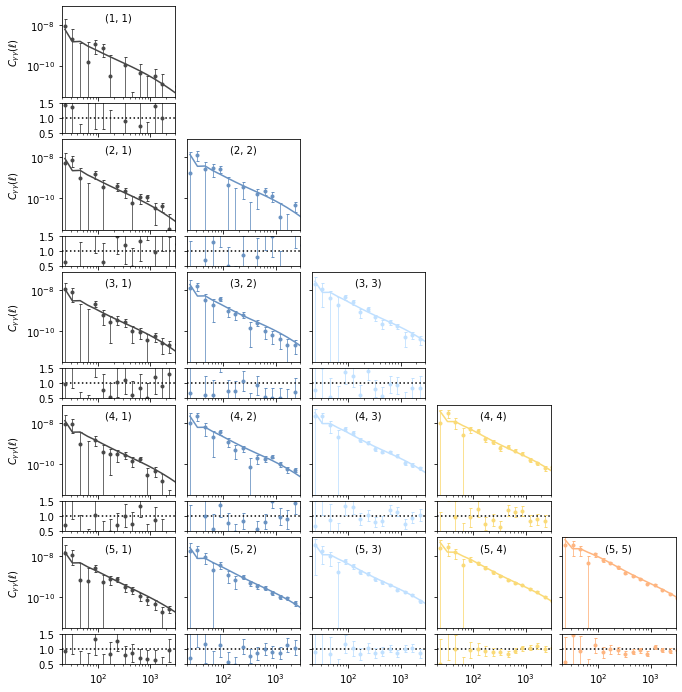

In [16]:
fig = plot_cosmic_shear_fourier(df, tf)
plt.savefig(dir + 'plots/paper_plots/' + 'cosmic_shear_fourier.png', dpi = 500, bbox_inches = 'tight',  pad_inches = 0.1)
plt.savefig(dir + 'plots/paper_plots/' + 'cosmic_shear_fourier.pdf', bbox_inches = 'tight',  pad_inches = 0.1)

In [17]:
def plot_clustering_fourier(df, tf):

    name1 = 'lens'
    name2 = 'lens'
    fig, ax = plt.subplots(2, nlbins, figsize=(2.2*nlbins, 2.8), sharey='row', sharex=True, gridspec_kw={'height_ratios': [3, 1]})
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
        
    for j in range(nlbins): 
        
            dt = DD
            # this returns the gaussian cov

            ell, cl, cov = df.get_ell_cl(dt,'%s_%s'%(name1,j) , '%s_%s'%(name2, j), return_cov = True)
            err = np.sqrt(np.diag(cov))
            ell_th, cl_th = tf.get_ell_cl(dt,'%s_%s'%(name1,j) , '%s_%s'%(name2, j), return_cov = False)

            #print (len(cl), len(cl_th))
            ax[0][j].plot(ell_th, cl_th, ls = '-', lw = '1.5', color = c[j], label = 'Theory')
            ax[0][j].errorbar(ell, cl*sims_factor[j]**2, err, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[j], label = 'Measurements')
            
            ax[1][j].errorbar(ell, cl*sims_factor[j]**2/cl_th, err/cl_th, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[j])

            ax[0][j].set_yscale('log')
            ax[1][j].set_xlabel(r'$\ell$')
            ax[0][0].set_ylabel(r'$C_{\delta \delta}(\ell)$')
            ax[0][0].legend(frameon = False, loc = 'best')
            ax[0][j].set_xlim(lmin, 3000)
            ax[0][j].set_ylim(5*10**(-8), 10**(-4))
            ax[1][j].axhline(y=1, ls = ':', color = 'k')
            ax[1][j].set_ylim(0.5,1.5)
            
            for k in range(2):
                ax[k][j].axvspan(lmax_zl[j], 3000, color='lightgrey', alpha = 0.3)
                ax[k][j].set_xscale('log')

    return fig

def plot_clustering_real(dr, tr):
    
    
    name1 = 'lens'
    name2 = 'lens'
    fig, ax = plt.subplots(2, nsbins, figsize=(2.2*nsbins, 2.8), sharey='row', sharex=True, gridspec_kw={'height_ratios': [3, 1]})
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
        
    for j in range(nlbins):       
        dt = W
        # this returns the gaussian cov
        theta, xi, cov = dr.get_theta_xi(dt,'%s_%s'%(name1,j) , '%s_%s'%(name2, j), return_cov = True)
        err = np.sqrt(np.diag(cov))
        theta_th, xi_th = tr.get_theta_xi(dt,'%s_%s'%(name1,j) , '%s_%s'%(name2, j), return_cov = False)

        ax[0][j].plot(theta, xi_th, ls = '-', lw = '1.5', color = c[j], label = 'Theory')
        ax[0][j].errorbar(theta, xi*sims_factor[j]**2, err, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[j], label = 'Measurements')
        ax[1][j].errorbar(theta, xi*sims_factor[j]**2/xi_th, err/xi_th, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[j])

        ax[0][j].set_yscale('log')
        ax[0][j].set_xlim(2.5, 250)
        ax[1][j].set_xlabel(r'$\theta$ [arcmin]')
        ax[0][0].set_ylabel(r'$w(\theta)$')
        ax[1][j].axhline(y=1, ls = ':', color = 'k')
        ax[1][j].set_ylim(0.5,1.5)
        
        for k in range(2):
            ax[k][j].axvspan(2.5, theta_min[j], color='lightgrey', alpha = 0.3)
            ax[k][j].set_xscale('log')

    return fig



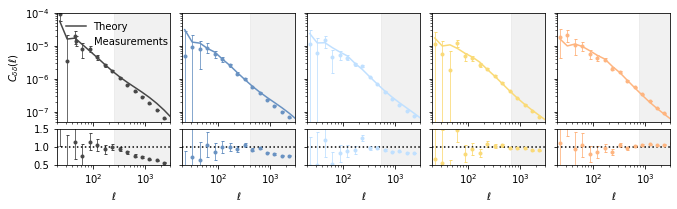

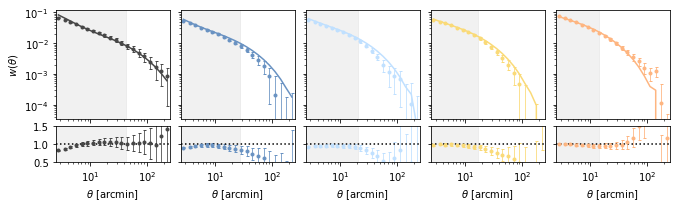

In [18]:
fig = plot_clustering_fourier(df, tf)
plt.savefig(dir + 'plots/paper_plots/' + 'clustering_fourier.png', dpi = 500, bbox_inches = 'tight',  pad_inches = 0.1)
plt.savefig(dir + 'plots/paper_plots/' + 'clustering_fourier.pdf', bbox_inches = 'tight',  pad_inches = 0.1)
fig = plot_clustering_real(dr, tr)
plt.savefig(dir + 'plots/paper_plots/' + 'clustering_real.png', dpi = 500, bbox_inches = 'tight',  pad_inches = 0.1)
plt.savefig(dir + 'plots/paper_plots/' + 'clustering_real.pdf', bbox_inches = 'tight',  pad_inches = 0.1)

In [19]:
def plot_ggl_fourier(df, tf):

    name1 = 'source'
    name2 = 'lens'
    fig, ax = plt.subplots(nlbins*2, nlbins, figsize=(2.2*nsbins, 2.2*nsbins*1.1), sharey='row', sharex=True, gridspec_kw={'height_ratios': [3, 1, 3, 1, 3, 1, 3, 1, 3, 1]})
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
        
    for i in range(nlbins*2):    
         for j in range(nlbins):    
                ell, cl, cov = df.get_ell_cl(ED,'%s_%s'%(name1,int(i/2)) , '%s_%s'%(name2, j), return_cov = True)
                ell_th, cl_th = tf.get_ell_cl(ED,'%s_%s'%(name1,int(i/2)) , '%s_%s'%(name2, j))
                err = np.sqrt(np.diag(cov))
                ax[i][j].set_xlim(lmin, lmax_cs)
                ax[i][j].set_xscale('log')
                if GGL_combinations_dict['zl%dzs%d'%(j,int(i/2))]:
                    ax[i][j].axvspan(lmax_zl[j], 3000, color='lightgrey', alpha = 0.3)
                else:
                    ax[i][j].axvspan(lmin, 3000, color='lightgrey', alpha = 0.3)
                        
                if i%2==0:
                    ax[i][j].plot(ell_th, cl_th, ls = '-', lw = '1.5', color = c[j], label = 'Theory')
                    ax[i][j].errorbar(ell, cl*sims_factor[j], err, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[j], label = 'Measurements')
                    ax[-1][j].set_xlabel(r'$\ell$')
                    ax[i][0].set_ylabel(r'$C_{\delta \gamma}(\ell)$')
                    
                    ax[i][j].set_yscale('log')   
                    ax[i][j].set_ylim(5*10**(-10), 3*10**(-6))


                    ax[i][j].text(0.5, 0.88, "(%d, %d)"%(j+1, int(i/2)+1), horizontalalignment='center',
                                    verticalalignment='center', transform=ax[i][j].transAxes)#, fontsize=12
                else:
                    ax[i][j].set_ylim(0.5,1.5)
                    ax[i][j].axhline(y=1, ls = ':', color = 'k')
                    ax[i][j].errorbar(ell, cl*sims_factor[j]/cl_th, err/cl_th, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[j], label = 'Measurements')
            #if i<j:
            #    fig.delaxes(ax[i, j])
            


    return fig

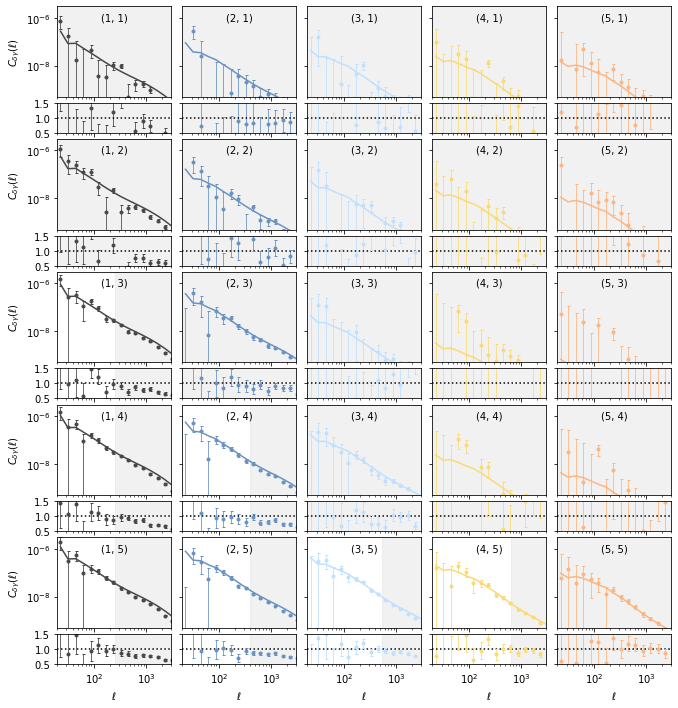

In [20]:
fig = plot_ggl_fourier(df, tf)
plt.savefig(dir + 'plots/paper_plots/' + 'ggl_fourier.png', dpi = 500, bbox_inches = 'tight',  pad_inches = 0.1)
plt.savefig(dir + 'plots/paper_plots/' + 'ggl_fourier.pdf', bbox_inches = 'tight',  pad_inches = 0.1)

In [21]:
def plot_ggl_comb(df, tf, dr, tr):

    name1 = 'source'
    name2 = 'lens'
    fig, ax = plt.subplots(nlbins*2, nlbins, figsize=(2.2*nsbins, 2.2*nsbins*1.1), sharey=False, sharex=False, gridspec_kw={'height_ratios': [3, 1, 3, 1, 3, 1, 3, 1, 3, 1]})
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
        
    for i in range(nlbins*2):    
         for j in range(nlbins):   

                ell, cl, cov = df.get_ell_cl(ED,'%s_%s'%(name1,int(i/2)) , '%s_%s'%(name2, j), return_cov = True)
                err = np.sqrt(np.diag(cov))
                ell_th, cl_th = tf.get_ell_cl(ED,'%s_%s'%(name1,int(i/2)) , '%s_%s'%(name2, j))
                
                th, xi, cov_xi = dr.get_theta_xi(GAMMA,'%s_%s'%(name1,int(i/2)) , '%s_%s'%(name2, j), return_cov = True)
                err_xi = np.sqrt(np.diag(cov_xi))
                th, xi_th = tr.get_theta_xi(GAMMA,'%s_%s'%(name1,int(i/2)) , '%s_%s'%(name2, j))            
                
                #ax[i][j].text(0.5, 0.5, "(i=%d, j=%d)"%( i, j), horizontalalignment='center',
                #                       verticalalignment='center', transform=ax[i][j].transAxes)#, fontsize=12     
                
                if int(i/2)>j: 

                    # real space part
                    ax[nlbins*2-i-1][nlbins-j-1].set_xlim(2.5, 250)
                    #ax[nlbins*2-i-1][nlbins-j-1].set_ylim(10**(-5), 6*10**(-3))
                    ax[nlbins*2-i-1][nlbins-j-1].set_xscale('log')
                    #print(th, xi*sims_factor[j])
                    if i%2==1:
                        ax[nlbins*2-i-1][nlbins-j-1].set_yscale('log')
                        ax[nlbins*2-i-1][nlbins-j-1].errorbar(th, xi*sims_factor[j], err_xi, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[j], label = 'Measurements')
                        ax[nlbins*2-i-1][nlbins-j-1].plot(th, xi_th, color = c[j], label = 'Theory')
                    else:
                        ax[nlbins*2-i-1][nlbins-j-1].errorbar(th, xi*sims_factor[j]/xi_th, err_xi/xi_th, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[j], label = 'Measurements')
                        ax[nlbins*2-i-1][nlbins-j-1].axhline(y=1, ls = ':', color = 'k')
                        ax[nlbins*2-i-1][nlbins-j-1].set_ylim(0.5,1.5)

                    # Fourier space part
                    ax[i][j].set_xlim(lmin, 3000)
                    ax[i][j].set_xscale('log')
                    
                    if (i!=9):
                        ax[i][j].set_xticklabels([])
        
                    if GGL_combinations_dict['zl%dzs%d'%(j,int(i/2))]:
                        ax[i][j].axvspan(lmax_zl[j], 3000, color='lightgrey', alpha = 0.3)
                        ax[nlbins*2-i-1][nlbins-j-1].axvspan(2.5, theta_min[j], color='lightgrey', alpha = 0.3)
                    else:
                        ax[i][j].axvspan(lmin, 3000, color='lightgrey', alpha = 0.3)
                        ax[nlbins*2-i-1][nlbins-j-1].axvspan(2.5, 300, color='lightgrey', alpha = 0.3)

                    if i%2==0:
                        ax[i][j].plot(ell_th, cl_th, ls = '-', lw = '1.5', color = c[j], label = 'Theory')
                        ax[i][j].errorbar(ell, cl*sims_factor[j], err, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[j], label = 'Measurements')
                        ax[-1][j].set_xlabel(r'$\ell$')
                        ax[i][0].set_ylabel(r'$C_{\delta \gamma}(\ell)$')

                        ax[i][j].set_yscale('log')   
                        ax[i][j].set_ylim(10**(-9), 2*10**(-6))


                        ax[i][j].text(0.5, 0.88, "(%d, %d)"%(j+1, int(i/2)+1), horizontalalignment='center',
                                        verticalalignment='center', transform=ax[i][j].transAxes)#, fontsize=12
                    
                    else:
                        ax[nlbins*2-i-1][nlbins-j-1].text(0.5, 0.88, "(%d, %d)"%(j+1, int(i/2)+1), horizontalalignment='center',
                                verticalalignment='center', transform=ax[nlbins*2-i-1][nlbins-j-1].transAxes)#, fontsize=12
                        ax[i][j].set_ylim(0.5,1.5)
                        ax[i][j].axhline(y=1, ls = ':', color = 'k')
                        ax[i][j].errorbar(ell, cl*sims_factor[j]/cl_th, err/cl_th, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[j], label = 'Measurements')
                        
                if (i/2==j) or (np.abs(int(i/2)-j)==0):
                        fig.delaxes(ax[i, j])

                        
                if int(i/2)<j: 
                    if not ((j==1 and i==1) or (j==2 and i==3) or (j==3 and i==5) or (j==4 and i==7)):
                            ax[i][j].set_xticklabels([])
                    if ((j==1 and i==1) or (j==2 and i==3) or (j==3 and i==5) or (j==4 and i==7)):
                         ax[i][j].set_xlabel(r'$\theta$ [arcmin]')
                    if ((j==1 and i==0) or (j==2 and i==2) or (j==3 and i==4) or (j==4 and i==6)):
                         ax[i][j].set_ylabel(r'$\gamma_t (\theta)$')
               
            
                ax[4][1].set_yticklabels([])
                ax[5][1].set_yticklabels([])  
                ax[6][1].set_yticklabels([])
                ax[7][1].set_yticklabels([])  
                ax[8][1].set_yticklabels([])   
                
                ax[0][2].set_yticklabels([])
                ax[1][2].set_yticklabels([])  
                ax[6][2].set_yticklabels([])
                ax[7][2].set_yticklabels([])  
                ax[8][2].set_yticklabels([])
                ax[9][2].set_yticklabels([]) 

                ax[0][3].set_yticklabels([])
                ax[1][3].set_yticklabels([])  
                ax[2][3].set_yticklabels([])
                ax[3][3].set_yticklabels([])  
                ax[8][3].set_yticklabels([])
                ax[9][3].set_yticklabels([])  
                
                ax[0][4].set_yticklabels([])
                ax[1][4].set_yticklabels([])  
                ax[2][4].set_yticklabels([])
                ax[3][4].set_yticklabels([])  
                ax[4][4].set_yticklabels([])
                ax[5][4].set_yticklabels([])  
           


    return fig

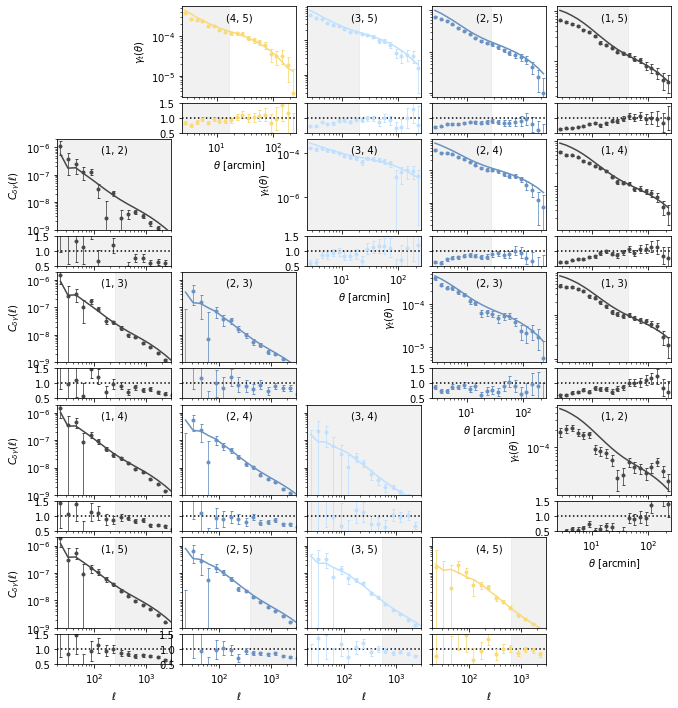

In [22]:
fig = plot_ggl_comb(df, tf, dr, tr)
plt.savefig(dir + 'plots/paper_plots/' + 'ggl_comb.png', dpi = 500, bbox_inches = 'tight',  pad_inches = 0.1)
plt.savefig(dir + 'plots/paper_plots/' + 'ggl_comb.pdf', bbox_inches = 'tight',  pad_inches = 0.1)

# Some cross-checks: gammax

In [23]:
def plot_gammax(s):        
    
    nbins1 = nsbins
    nbins2 = nlbins
    name1 = 'source'
    name2 = 'lens'


    fig, ax = plt.subplots(nbins1, nbins2, figsize=(2.2*nbins1, 3.2*nbins2), sharey=True, sharex=True)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    for i in range(nbins1):
        for j in range(nbins2):

            # this returns the JK cov
            theta, xi, cov = s.get_theta_xi('galaxy_shearDensity_xi_x','%s_%s'%(name1,i) , '%s_%s'%(name2, j), return_cov = True)
            #print('i, j, xi:', i, j, xi)
            mask_ls = theta<100
            theta = theta[mask_ls]
            xi = xi[mask_ls]
            cov = (cov[mask_ls]).T[mask_ls]
            err = np.sqrt(np.diag(cov))

                    
            ax[i][j].errorbar(theta, xi*theta, err*theta, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[0], label = 'Measurements')
            ax[i][j].text(0.5, 0.88, "(%d, %d)"%(i+1, j+1), horizontalalignment='center',
                            verticalalignment='center', transform=ax[i][j].transAxes)#, fontsize=12)
            ax[i][j].set_xscale('log')
            ax[i][j].set_xlim(2, 110)
            ax[i][j].set_ylim(-0.005, 0.005)
            ax[i][j].axhline(y=0, color = 'k', ls = ':')      

            #ax[i][j].set_yscale('log')
 

            if i==nsbins-1: 
                ax[i][j].set_xlabel(r'$\theta$ [arcmin]')
            if j==0:
                ax[i][j].set_ylabel(r'$\gamma_\times \times \theta$')

    ax[0][0].legend(frameon = False, loc = 'best')

    return fig


In [24]:
covname = 'JK'
fig = plot_gammax(gammax)
plt.savefig(dir + 'plots/' + 'gammax_%s'%covname, dpi = 500, bbox_inches = 'tight',  pad_inches = 0.1)

NameError: name 'gammax' is not defined

## Plot covariances now

In [25]:
def corrmatrix(cov):
    cov = np.mat(cov)
    D = np.diag(np.sqrt(np.diag(cov)))
    d = np.linalg.inv(D)
    corr = d*cov*d
    return corr

def plot_cov(cov, size):
    
    ncov1 = len(cov)
    ncov2 = len(cov[0])
    
    corr = corrmatrix(cov)
    cov_vmin = np.min(corr)
    
    figsize1 = 1.22222222227*ncov1/size
    figsize2 = ncov2/size
    fig, ax = plt.subplots(1, 1, figsize=(figsize1, figsize2))
    im = ax.imshow(corr, interpolation='nearest',
                           aspect='auto', origin='lower', vmin=-1, vmax=1., cmap = 'RdYlBu')
    cbar = fig.colorbar(im)
    return fig

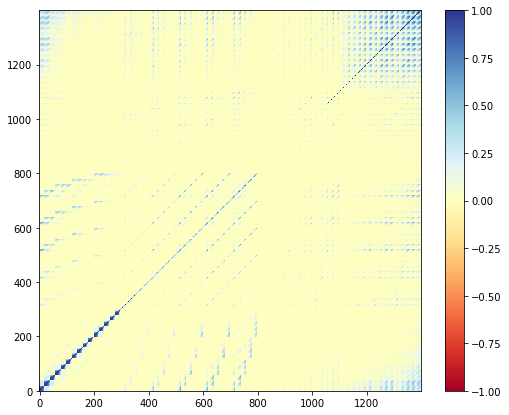

In [29]:
cov = plot_cov(dr.covariance.covmat, 200)
plt.savefig(dir + 'plots/cov_3x2pt_JK.png', dpi = 300, bbox_inches = 'tight',  pad_inches = 0.1)

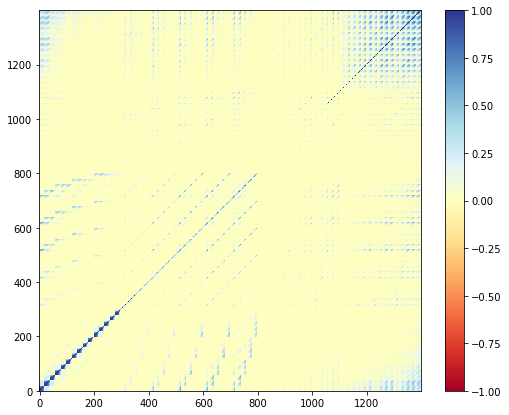

In [30]:
cov = plot_cov(dr.covariance.covmat, 200)
plt.savefig(dir + 'plots/cov_3x2pt_theory.pdf', dpi = 300, bbox_inches = 'tight',  pad_inches = 0.1)

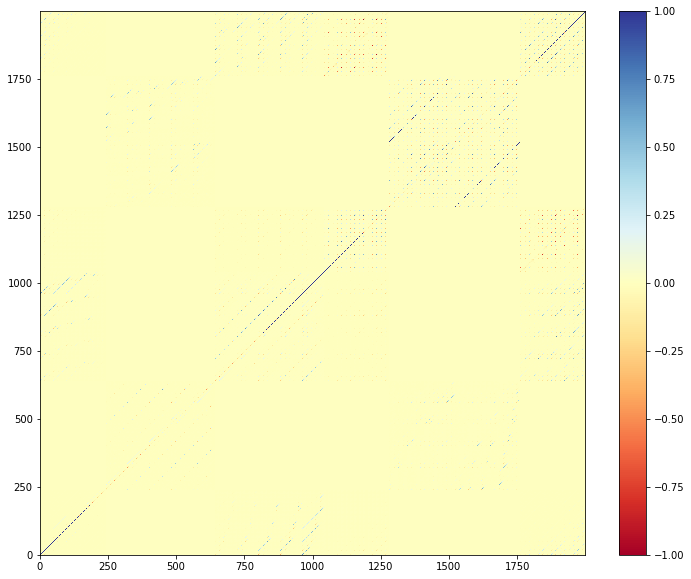

In [31]:
cov = plot_cov(df.covariance.covmat, 200)
plt.savefig(dir + 'plots/cov_3x2pt_theory_fourier.png', dpi = 300, bbox_inches = 'tight',  pad_inches = 0.1)

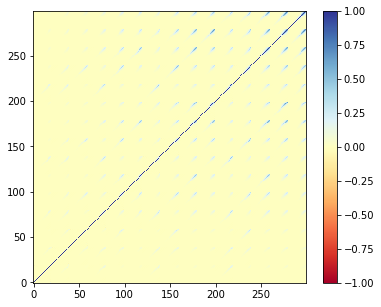

In [32]:
indices_p = dr.indices('galaxy_shear_xi_minus')
cov = plot_cov(dr.covariance.get_block(indices_p), 60)
plt.savefig(dir + 'plots/cov_xim_theory.png', dpi = 300, bbox_inches = 'tight',  pad_inches = 0.1)

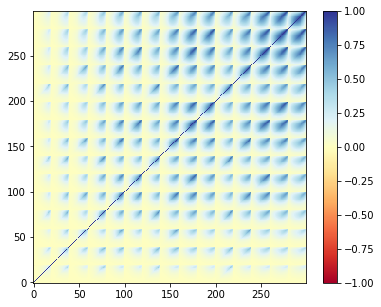

In [33]:
indices_p = dr.indices('galaxy_shear_xi_plus')
cov = plot_cov(dr.covariance.get_block(indices_p), 60)
plt.savefig(dir + 'plots/cov_xip_theory.png', dpi = 300, bbox_inches = 'tight',  pad_inches = 0.1)

In [34]:
def plot_cosmic_shear_comb(df, tf, dr, tr):

    name1 = 'source'
    name2 = 'source'
    fig, ax = plt.subplots((nsbins+1)*2, nsbins+1, figsize=(2.2*nsbins+0.5, 2.2*nsbins*1.1+0.5), sharey=False, sharex=False, gridspec_kw={'height_ratios': [3., 1, 3., 1, 3., 1, 3., 1, 3., 1, 3., 1.]})
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
               
    for i in range(nsbins*2):

        for j in range(nsbins):    
            
            ax[i][j].text(0.5, 0.78, "(i=%d, j=%d)"%(i, j), horizontalalignment='center',
                    verticalalignment='center', transform=ax[i][j].transAxes)#, fontsize=12)
            
            #ax[i][j].set_yscale('log') 
            ax[i][j].set_xscale('log') 
            ell, cl, cov = df.get_ell_cl(EE,'%s_%s'%(name1,int(i/2)) , '%s_%s'%(name2, j), return_cov = True)
            ell_th, cl_th = tf.get_ell_cl(EE,'%s_%s'%(name1,int(i/2)) , '%s_%s'%(name2, j))
            err = np.sqrt(np.diag(cov))
                

            theta, xi, cov_xi = dr.get_theta_xi(XIP,'%s_%s'%(name1,int(i/2)) , '%s_%s'%(name2, j), return_cov = True)
            err_xi = np.sqrt(np.diag(cov_xi))
            theta, xi_th = tr.get_theta_xi(XIP,'%s_%s'%(name1,int(i/2)) , '%s_%s'%(name2, j)) 
            
            if (int(i/2))==j:
                fig.delaxes(ax[i, j]) # delete diagonal
            
            if i>=2 and j<5 and i/2>j: #lower left half. 
                print('low left half', i, j)
                
                
                ax[i][j].set_xlim(100, 3000)
                
                if i%2==0:
                    ax[i][j].plot(ell_th, cl_th, ls = '-', lw = '1.5', color = c[j], label = 'Theory')
                    ax[i][j].errorbar(ell, cl, err, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[j], label = 'Measurements')
                    ax[0][j].set_xlabel(r'$\ell$')
                    ax[i][0].set_ylabel(r'$C_{\gamma \gamma}(\ell)$')
                    ax[i][j].set_xscale('log')
                    ax[i][j].set_yscale('log')   

                    ax[i][j].set_ylim(2*10**(-12), 2*10**(-8))
                    ax[i][j].set_xlim(100, 3000)

                    ax[i][j].text(0.5, 0.88, "(%d, %d)"%(j+1, int(i/2)+1), horizontalalignment='center',
                                    verticalalignment='center', transform=ax[i+2][j].transAxes)#, fontsize=12)
                    
                    
                else:
                    ax[i][j].set_ylim(0.5,1.5)
                    ax[i][j].set_xlim(100, 3000)
                    ax[i][j].axhline(y=1, ls = ':', color = 'k')
                    ax[i][j].errorbar(ell, cl/cl_th, err/cl_th, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[j])

            
                
                
            if j>=1 and i<9 and i/2<j:
                print('upper right half', i, j)
            #if True:  #upper right half. 

                #print('i,j', i,j)
                ax[i][j].set_xlim(2.5, 250)
                x = nsbins*2-i-1
                y = nsbins-j
                
                if i%2==1:
                    
                    print('x,y:',x,y)

                    ax[x][y].plot(theta, xi_th, ls = '-', lw = '1.5', color = c[j], label = 'Theory')
                    ax[x][y].errorbar(theta, xi, err_xi, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[j], label = 'Measurements')
                    ax[x][y].set_ylim(4*10**(-7), 6*10**(-4))
                    ax[x][y].set_yscale('log')
                    ax[x][y].set_xscale('log')

                    
                    #ax[i][0].set_ylabel(r'$\xi{+/-}$')
                    #ax[i][j+1].set_xscale('log')
                    #ax[i][j+1].set_yscale('log')   

                    ax[x][y].text(50, 10**(-5), "(%d, %d)"%(j+1, int(i/2)+1), horizontalalignment='center',
                                    verticalalignment='center')#, transform=[x][y].transAxes)#, fontsize=12)
                    
                else:
                    #print(x,y)
                    ax[x][y].set_ylim(0.5,1.5)
                    ax[x][y].axhline(y=1, ls = ':', color = 'k')
                    ax[x][y].errorbar(theta, xi/xi_th, err_xi/xi_th, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[j])
                
    fig.delaxes(ax[10, 5])
    fig.delaxes(ax[11, 5])
    ax[1][1].set_xlabel(r'$\theta$ [arcmin]')  
    ax[3][2].set_xlabel(r'$\theta$ [arcmin]')  
    ax[5][3].set_xlabel(r'$\theta$ [arcmin]')  
    ax[7][4].set_xlabel(r'$\theta$ [arcmin]') 
    ax[9][5].set_xlabel(r'$\theta$ [arcmin]')  

    

    return fig

## Compare covariances now

In [37]:
# fourier space
folder_bias = 'analytic_noise/bias_fit_by_eye/'
file = folder_bias + 'summary_statistics_fourier_tjpcov.sacc'
df_tjp = sacc.Sacc.load_fits(dir+file)

In [38]:
# fourier space
file = folder_bias+'summary_statistics_fourier.sacc'
df_nomask = sacc.Sacc.load_fits(dir+file)

In [64]:
def plot_errorbars(s, theory_cov = None,  theory_cov2 = None, ratios = False):
    
    fig, ax = plt.subplots(1, 3, figsize=(3.2*3, 2.8), sharey=True, sharex=True)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)      
    for d, dt in enumerate(s.get_data_types()):
        print(dt)    
        if dt == EE:
            nbins1 = nsbins
            nbins2 = nsbins
            name1 = 'source'
            name2 = 'source'
            label = 'Cosmic shear'
        
        if dt == ED:
            nbins1 = nsbins
            nbins2 = nlbins
            name1 = 'source'
            name2 = 'lens'
            label = 'Galaxy-galaxy lensing'

        if dt == DD:
            nbins1 = nlbins
            nbins2 = nlbins
            name1 = 'lens'
            name2 = 'lens'
            label = 'Galaxy clustering'

        for i in range(nbins1):
                for j in range(nbins2):

                    ell, _ = s.get_ell_cl(dt,'%s_%s'%(name1,i) , '%s_%s'%(name2, j))
                    if i>=j:

                        if theory_cov is not None:
                            # this returns the theory cov, and overwrites the error if theory_cov is not None
                            _, _, cov = theory_cov.get_ell_cl(dt,'%s_%s'%(name1,i) , '%s_%s'%(name2, j), return_cov = True)
                            err = np.sqrt(np.diag(cov))  
                            
                        if theory_cov2 is not None:
                            _, _, cov2 = theory_cov2.get_ell_cl(dt,'%s_%s'%(name1,i) , '%s_%s'%(name2, j), return_cov = True)
                            err2 = np.sqrt(np.diag(cov2))  
                    
                        if not ratios:
                            ax[d].plot(ell, err, ls = '-', lw = '1.5', color = c[1], label = 'TXFourierGaussianCov')
                            if theory_cov2 is not None:
                                ax[i].plot(ell, err2, ls = '-', lw = '1.5', color = c[3], label = 'TXFourierTJPCov')

                        if ratios:
                            ax[d].plot(ell, err2/err, ls = '-', lw = '1.', color = c[i], alpha = 0.5)
                            #if i ==0:
                            #    ax.plot(ell, err2/err, ls = '-', lw = '1.5', color = c[i], alpha = 0.5)

                        #if (datatype==EE) or ((datatype==DD or datatype==ED) and j>0 or i>0):
                        #    ax.text(0.5, 0.88, "(%d, %d)"%(i+1, j+1), horizontalalignment='center',
                        #                verticalalignment='center', transform=ax.transAxes)#, fontsize=12)
                            
                    ax[d].set_xscale('log')
                    ax[d].set_xlim(20, 3000)
                    if not ratios:
                        ax[d].set_yscale('log')
                    if ratios:                        
                        ax[d].set_ylim(0.9, 2.5)
                        
                    if i==nbins1-1: 
                        ax[d].set_xlabel(r'$\ell$')
                
                    if d==0:
                        ax[d].set_ylabel(r'$\sigma_{\texttt{Namaster}}$ (Mask effects)/$\sigma_{f_{\mathrm{sky}}}$')

        
                    #if i<j:
                    #    fig.delaxes(ax[i, j])
        ax[d].text(0.5, 0.79, label, horizontalalignment='center',
             verticalalignment='center', transform=ax[d].transAxes)#, fontsize=12)
        ax[d].text(0.5, 0.88, r'$\texttt{CosmoDC2}$', horizontalalignment='center',
             verticalalignment='center', transform=ax[d].transAxes)
    #ax.legend(frameon = False, loc = 'best', bbox_to_anchor=(2., 0.5, 0.5, 0.5))
        labels = ['']
    for d in range(3):
            ax[d].axhline(y=1, color = 'k', ls= ':')
            
    return fig


galaxy_density_cl
galaxy_shearDensity_cl_e


/Users/juditprat/anaconda3/anaconda3/lib/python3.7/site-packages/sacc/sacc.py:370: UserWarning: Empty index selected - maybe you should check the tracer order?
  warnings.warn("Empty index selected - maybe you "


galaxy_shear_cl_ee


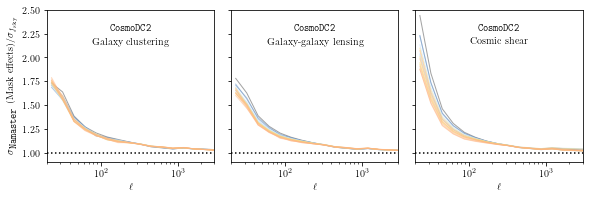

In [65]:
fig = plot_errorbars(df_nomask, theory_cov = df_nomask,  theory_cov2 = df_tjp,  ratios = True)
plt.savefig(dir + 'plots/paper_plots/'+ 'tjp_vs_fsky', dpi = 500, bbox_inches = 'tight',  pad_inches = 0.1)
plt.savefig(dir + 'plots/paper_plots/'+ 'tjp_vs_fsky.pdf',  bbox_inches = 'tight',  pad_inches = 0.1)

In [44]:
df_nomask.get_data_types()

['galaxy_density_cl', 'galaxy_shearDensity_cl_e', 'galaxy_shear_cl_ee']

In [45]:
df_tjp.get_data_types()

['galaxy_density_cl',
 'galaxy_shearDensity_cl_b',
 'galaxy_shearDensity_cl_e',
 'galaxy_shear_cl_bb',
 'galaxy_shear_cl_be',
 'galaxy_shear_cl_eb',
 'galaxy_shear_cl_ee']